### Working of Hybrid model
#### Data Mining Project, done by Waleed Saeed and Yahya Qureshi

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

Epoch 1/50
731/731 [==============================] - 2s 2ms/step - loss: 0.1252
Epoch 2/50
731/731 [==============================] - 2s 2ms/step - loss: 0.0248
Epoch 3/50
731/731 [==============================] - 2s 3ms/step - loss: 0.0092
Epoch 4/50
731/731 [==============================] - 2s 2ms/step - loss: 0.0019
Epoch 5/50
731/731 [==============================] - 1s 2ms/step - loss: 1.6274e-04
Epoch 6/50
731/731 [==============================] - 1s 2ms/step - loss: 2.8843e-05
Epoch 7/50
731/731 [==============================] - 1s 2ms/step - loss: 2.4737e-05
Epoch 8/50
731/731 [==============================] - 1s 2ms/step - loss: 2.3522e-05
Epoch 9/50
731/731 [==============================] - 1s 2ms/step - loss: 2.4419e-05
Epoch 10/50
731/731 [==============================] - 1s 2ms/step - loss: 2.4871e-05
Epoch 11/50
731/731 [==============================] - 1s 2ms/step - loss: 2.5170e-05
Epoch 12/50
731/731 [==============================] - 2s 2ms/step - loss: 2.64

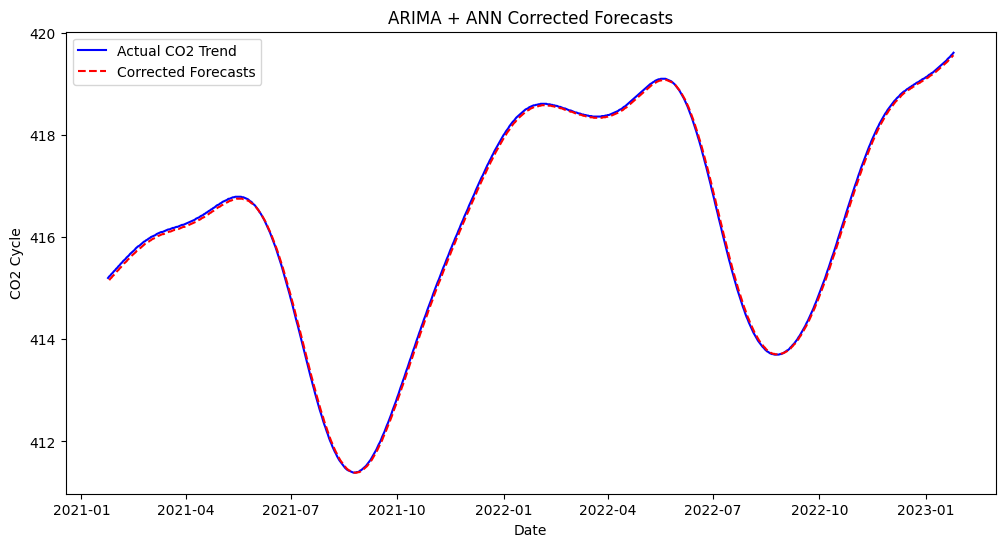

In [1]:
#arima on cycle
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



# Load the dataset
file_path = 'Data.csv'
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)
co2_trend = data['cycle']

# Split data into train and test sets
train_size = int(len(co2_trend) * 0.8)
train, test = co2_trend[:train_size], co2_trend[train_size:]

# Fit an ARIMA model (auto_arima can be used to find the best parameters)
arima_model = ARIMA(train, order=(1,1,1))
arima_result = arima_model.fit()

# Forecast using ARIMA
arima_forecast = arima_result.get_forecast(steps=len(test))
forecast_values = arima_forecast.predicted_mean

# Calculate residuals
residuals = test - forecast_values

# Normalize residuals for ANN training
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Prepare input for ANN
X_ann = residuals_scaled[:-1]
y_ann = residuals_scaled[1:]

# Define and train the ANN model
ann_model = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),
    Dense(1)
])
ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_ann, y_ann, epochs=50, batch_size=1, verbose=1)

# Predict corrections using the ANN model
ann_predictions = ann_model.predict(X_ann)

# Apply corrections
corrected_forecasts = forecast_values[:-1] + scaler.inverse_transform(ann_predictions).flatten()

# Calculate final MSE and RMSE
mse = mean_squared_error(test[1:], corrected_forecasts)
rmse = np.sqrt(mse)

print(f'Final MSE: {mse:.4f}')
print(f'Final RMSE: {rmse:.4f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual CO2 Trend', color='blue')
plt.plot(test.index[1:], corrected_forecasts, label='Corrected Forecasts', color='red', linestyle='--')
plt.title('ARIMA + ANN Corrected Forecasts')
plt.xlabel('Date')
plt.ylabel('CO2 Cycle')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Epoch 1/50
731/731 [==============================] - 2s 2ms/step - loss: 0.0170
Epoch 2/50
731/731 [==============================] - 2s 3ms/step - loss: 5.3735e-04
Epoch 3/50
731/731 [==============================] - 2s 3ms/step - loss: 3.3176e-05
Epoch 4/50
731/731 [==============================] - 1s 2ms/step - loss: 3.1970e-05
Epoch 5/50
731/731 [==============================] - 1s 2ms/step - loss: 3.2134e-05
Epoch 6/50
731/731 [==============================] - 1s 2ms/step - loss: 3.4045e-05
Epoch 7/50
731/731 [==============================] - 1s 2ms/step - loss: 3.5236e-05
Epoch 8/50
731/731 [==============================] - 1s 2ms/step - loss: 3.7870e-05
Epoch 9/50
731/731 [==============================] - 1s 2ms/step - loss: 3.8722e-05
Epoch 10/50
731/731 [==============================] - 1s 2ms/step - loss: 3.9707e-05
Epoch 11/50
731/731 [==============================] - 1s 2ms/step - loss: 4.3816e-05
Epoch 12/50
731/731 [==============================] - 2s 3ms/step 

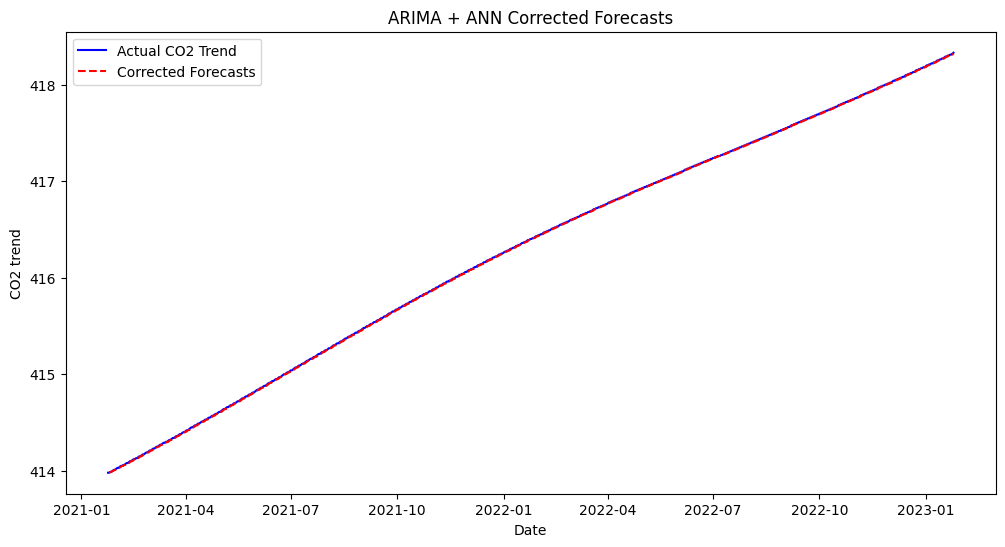

In [2]:

# Load the dataset
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)
co2_trend = data['trend']

# Split data into train and test sets
train_size = int(len(co2_trend) * 0.8)
train, test = co2_trend[:train_size], co2_trend[train_size:]

# Fit an ARIMA model (auto_arima can be used to find the best parameters)
arima_model = ARIMA(train, order=(1,1,1))
arima_result = arima_model.fit()

# Forecast using ARIMA
arima_forecast = arima_result.get_forecast(steps=len(test))
forecast_values = arima_forecast.predicted_mean

# Calculate residuals
residuals = test - forecast_values

# Normalize residuals for ANN training
scaler = MinMaxScaler()
residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))

# Prepare input for ANN
X_ann = residuals_scaled[:-1]
y_ann = residuals_scaled[1:]

# Define and train the ANN model
ann_model = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),
    Dense(1)
])
ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_ann, y_ann, epochs=50, batch_size=1, verbose=1)

# Predict corrections using the ANN model
ann_predictions = ann_model.predict(X_ann)

# Apply corrections
corrected_forecasts = forecast_values[:-1] + scaler.inverse_transform(ann_predictions).flatten()

# Calculate final MSE and RMSE
mse = mean_squared_error(test[1:], corrected_forecasts)
rmse = np.sqrt(mse)

print(f'Final MSE: {mse:.4f}')
print(f'Final RMSE: {rmse:.4f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual CO2 Trend', color='blue')
plt.plot(test.index[1:], corrected_forecasts, label='Corrected Forecasts', color='red', linestyle='--')
plt.title('ARIMA + ANN Corrected Forecasts')
plt.xlabel('Date')
plt.ylabel('CO2 trend')
plt.legend()
plt.show()


In [3]:
# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


actual_values = test[1:]
predicted_values = corrected_forecasts

mape = mean_absolute_percentage_error(actual_values, predicted_values)
accuracy = 100 - mape

print(f"MAPE: {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")


MAPE: 0.00%
Accuracy: 100.00%


In [4]:
# Load dataset
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('date', inplace=True)

column_to_model = 'trend'
time_series = data[column_to_model]
tscv = TimeSeriesSplit(n_splits=5)

mse_scores = []

for train_index, test_index in tscv.split(time_series):
    train, test = time_series.iloc[train_index], time_series.iloc[test_index]

    # Fit ARIMA model
    arima_model = ARIMA(train, order=(1,1,1))
    arima_result = arima_model.fit()
    arima_forecast = arima_result.forecast(steps=len(test))

    # Compute residuals
    residuals = test - arima_forecast

    # Normalize residuals for ANN training
    scaler = MinMaxScaler()
    residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))
    X_ann = residuals_scaled[:-1]
    y_ann = residuals_scaled[1:]

    # Define and train the ANN model
    ann_model = Sequential([
        Dense(10, activation='relu', input_shape=(1,)),
        Dense(1)
    ])
    ann_model.compile(optimizer='adam', loss='mean_squared_error')
    ann_model.fit(X_ann, y_ann, epochs=50, batch_size=1, verbose=0)

    # Predict corrections using the ANN model
    ann_predictions = ann_model.predict(X_ann)

    # Apply corrections
    corrected_forecasts = arima_forecast[:-1] + scaler.inverse_transform(ann_predictions).flatten()

    # Calculate and store MSE for this fold
    mse = mean_squared_error(test[1:], corrected_forecasts)
    mse_scores.append(mse)

# Output the average MSE over all folds
average_mse = np.mean(mse_scores)
print(f'Average MSE across all folds: {average_mse:.4f}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


19/19 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


19/19 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

19/19 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

19/19 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

19/19 [==============================] - 0s 1ms/step
Average MSE across all folds: 0.0001
